# CNN

## MNIST 손글씨 인식

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터셋 로드
(X_train,Y_class_train),(X_test,Y_class_test)=mnist.load_data()

### 데이터 확인

In [3]:
X_train.shape,Y_class_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape,Y_class_test.shape

((10000, 28, 28), (10000,))

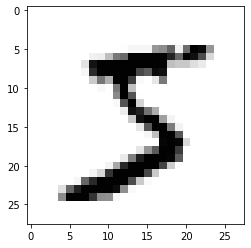

In [5]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [6]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%3d"%i)
    sys.stdout.write("\n")

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [8]:
X_train[0].shape

(28, 28)

 - 가로 28 * 세로 28 = 총 784 개의 픽셀 
 
 - 각 픽셀은 밝기 정도에 따라 0부터 255까지의 등급을 매김
 
 - 784개의 속성을 이용해 0~9까지 10개의 클래스 중 하나를 맞히는 문제


### 이미지 데이터 전처리

In [168]:
#주어진 가로 28, 세로28의 2차원 배열을 784개의 1차원 배열로 바꿔어 줌 
X_train=X_train.reshape(X_train.shape[0],784)

In [169]:
X_train.shape

(60000, 784)

- 케라스는 데이터를 0에서 1사의 값으로 변환한 다음 구동할 때 최적의 성능을 보임.

- 따라서 현재 0-255 사이의 값으로 이루어진 값을 0-1 사이의 값으로 바꿔야 함

In [170]:
X_train=X_train.astype("float64")
X_train=X_train/255

In [171]:
X_test=X_test.reshape(X_test.shape[0],784).astype("float64")/255

In [172]:
print("class : %d" % (Y_class_train[0]))

class : 5


In [173]:
Y_train=utils.to_categorical(Y_class_train,10)
Y_test=utils.to_categorical(Y_class_test,10)

In [174]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 학습

In [175]:
model=Sequential()
model.add(Dense(64,input_dim=784,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [176]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [177]:
import os

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.makedir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [178]:
checkpoint=ModelCheckpoint(filepath=modelpath,monitor="val_loss",verbose=1,save_best_only=True)

In [179]:
early_stop=EarlyStopping(monitor="val_loss",patience=15)

In [180]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=150,batch_size=128,callbacks=[checkpoint,early_stop])

Epoch 1/150
437/469 [==========================>...] - ETA: 0s - loss: 0.4123 - accuracy: 0.8808
Epoch 00001: val_loss improved from inf to 0.18296, saving model to ./model\01-0.1830.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.3970 - accuracy: 0.8853 - val_loss: 0.1830 - val_accuracy: 0.9450
Epoch 2/150
456/469 [============================>.] - ETA: 0s - loss: 0.1503 - accuracy: 0.9558
Epoch 00002: val_loss improved from 0.18296 to 0.13868, saving model to ./model\02-0.1387.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9561 - val_loss: 0.1387 - val_accuracy: 0.9594
Epoch 3/150
466/469 [============================>.] - ETA: 0s - loss: 0.1111 - accuracy: 0.9660
Epoch 00003: val_loss improved from 0.13868 to 0.11356, saving model to ./model\03-0.1136.hdf5
469/469 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.9660 - val_loss: 0.1136 - val_accuracy: 0.9646
Epoch 4/150
464/469 [==============

In [193]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 712us/step - loss: 0.1190 - accuracy: 0.9748


[0.1189974993467331, 0.9747999906539917]

In [186]:
val_loss=history.history["val_loss"]
train_loss=history.history["loss"]
x_len=np.arange(len(val_loss))

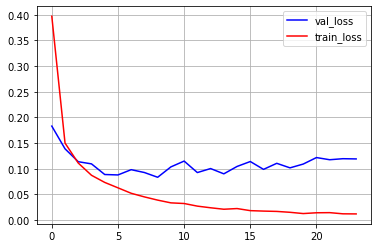

In [207]:
plt.plot(x_len,val_loss,"-",c="blue",markersize=3)
plt.plot(x_len,y_loss,"-",c="red",markersize=3)
plt.legend(["val_loss","train_loss"])
plt.grid(True)
plt.show()